1. Простейшие геометрические преобразования. Выбрать произвольное изображение. Выполнить над ним линейные и нелинейные преобразования (конформные, аффинные и проективные отображения).
2. Коррекция дисторсии. Выбрать произвольное изображениелибо с подушкообразной, либо с бочкообразной дисторсией. Выполнить коррекцию изображения.
3. «Склейка» изображений. Выбрать два изображения (снимки с фотокамеры, фрагменты сканированного изображенияи пр.), на которых имеется область пересечения. Выполнитькоррекцию второго изображения для его перевода в систему координат первого; затем выполнить автоматическую «склейку» из двух изображений в одно.


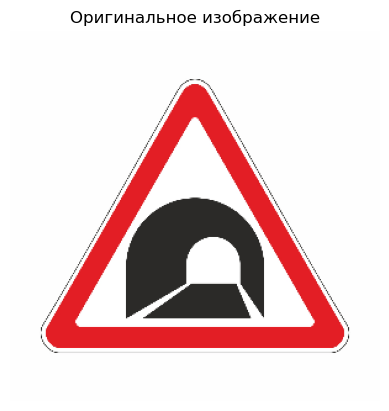

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


def compare_images(original_image, processed_image, title):
    # Функция для сравнения двух изображений

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Оригинальное изображение')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


# Загрузка и отображение оригинального изображения
image_path = "C:\\Users\\vs410\\Downloads\\1.31-tonnel.jpg"
original_image = cv2.imread(image_path)
original_image = cv2.resize(original_image, (300, 300))

plt.figure()
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Оригинальное изображение')
plt.axis('off')
plt.show()

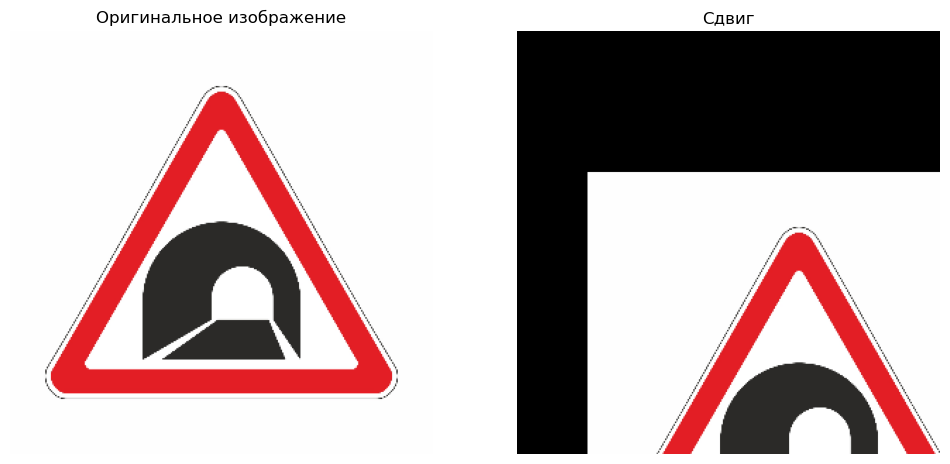

In [2]:
# Сдвиг изображения
rows, cols = original_image.shape[0:2]
translation_matrix = np.float32([[1, 0, 50], [0, 1, 100]])
shifted_image = cv2.warpAffine(original_image, translation_matrix, (cols, rows))
compare_images(original_image, shifted_image, 'Сдвиг')

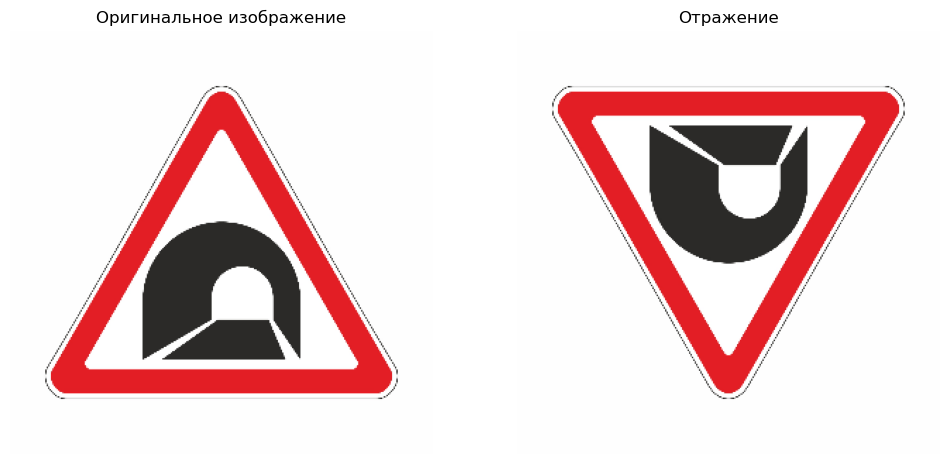

In [3]:
# Отражение изображения
reflection_matrix = np.float32([[1, 0, 0], [0, -1, rows - 1]])
reflected_image = cv2.warpAffine(original_image, reflection_matrix, (cols, rows))
compare_images(original_image, reflected_image, 'Отражение')

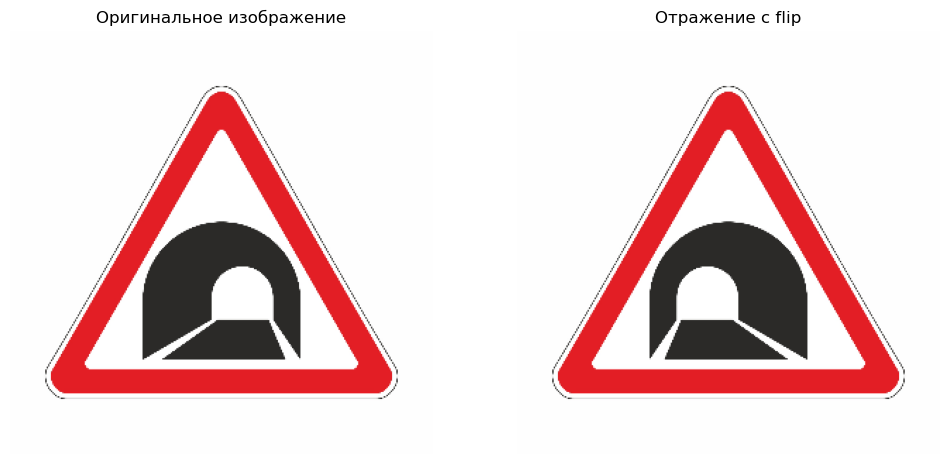

In [4]:
# Отражение с использованием flip
reflected_flip_image = cv2.flip(original_image, 1)
compare_images(original_image, reflected_flip_image, 'Отражение с flip')

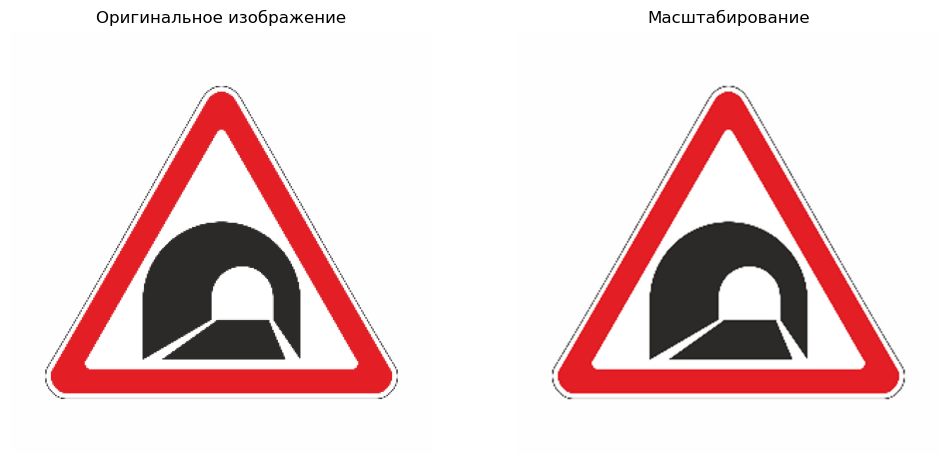

In [5]:
# Масштабирование изображения
scaled_image = cv2.resize(original_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
compare_images(original_image, scaled_image, 'Масштабирование')

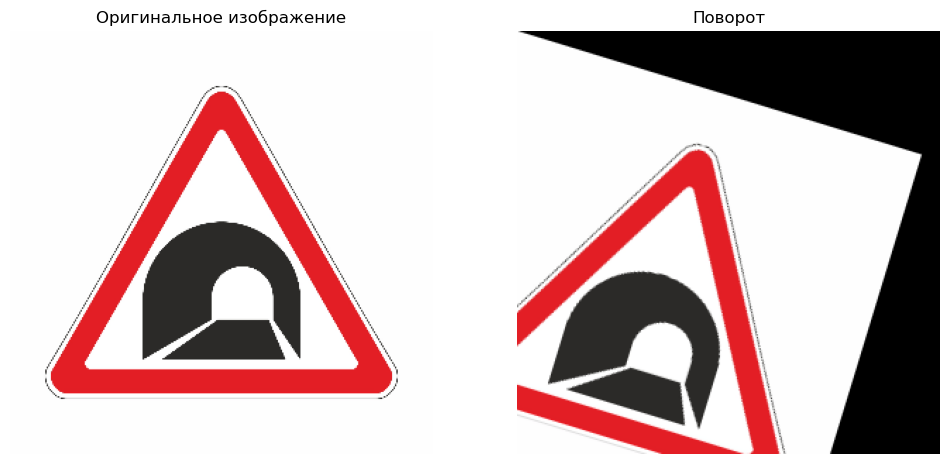

In [6]:
# Поворот изображения
rotation_angle = 17.0 * math.pi / 180
rotation_matrix = np.float32([[math.cos(rotation_angle), -math.sin(rotation_angle), 0],
                              [math.sin(rotation_angle), math.cos(rotation_angle), 0]])
rotated_image = cv2.warpAffine(original_image, rotation_matrix, (cols, rows))
compare_images(original_image, rotated_image, 'Поворот')

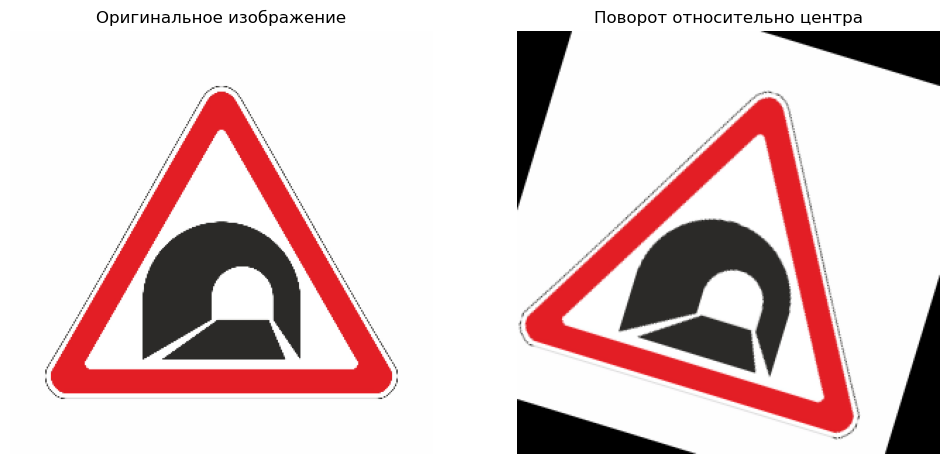

In [7]:
# Поворот изображения относительно центра
rotation_angle = 17.0
rotation_center_matrix = cv2.getRotationMatrix2D(((cols - 1) / 2.0, (rows - 1) / 2.0), -rotation_angle, 1)
rotated_center_image = cv2.warpAffine(original_image, rotation_center_matrix, (cols, rows))
compare_images(original_image, rotated_center_image, 'Поворот относительно центра')

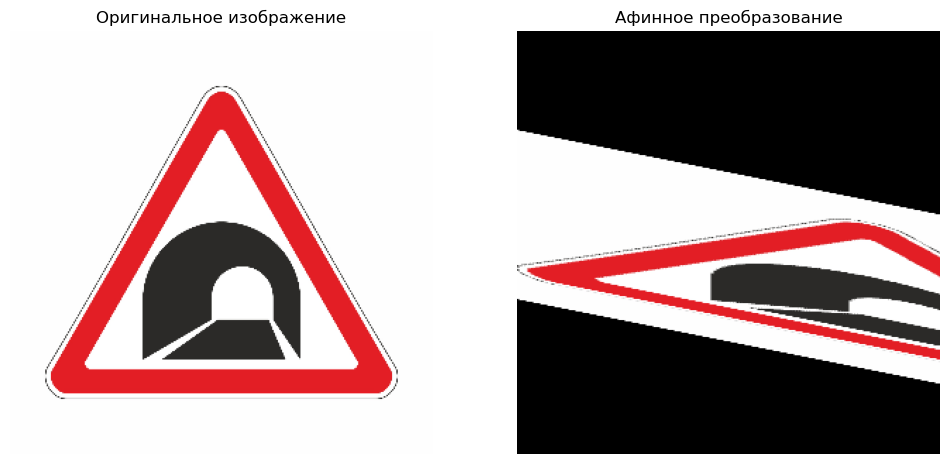

In [8]:
# Афинное преобразование изображения
source_points = np.float32([[50, 300], [150, 200], [50, 50]])
destination_points = np.float32([[50, 200], [250, 200], [50, 100]])
affine_matrix = cv2.getAffineTransform(source_points, destination_points)
affine_image = cv2.warpAffine(original_image, affine_matrix, (cols, rows))
compare_images(original_image, affine_image, 'Афинное преобразование')

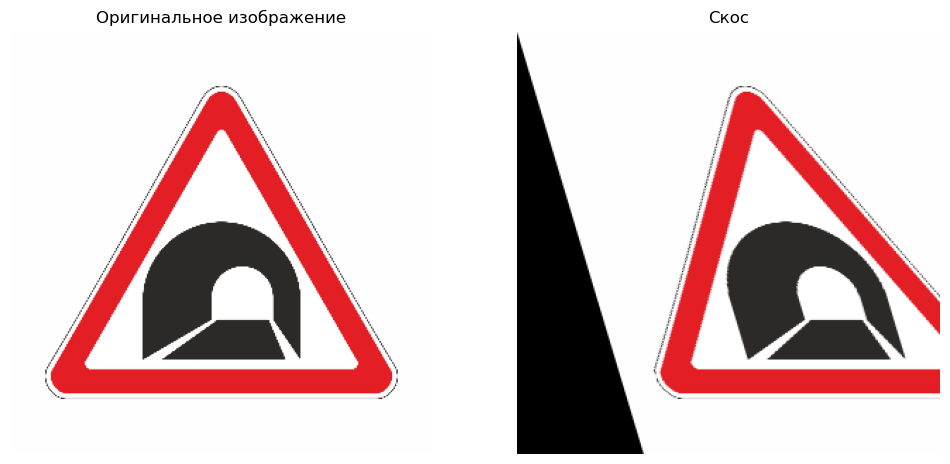

In [9]:
# Скос изображения
shear_factor = 0.3
shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
sheared_image = cv2.warpAffine(original_image, shear_matrix, (cols, rows))
compare_images(original_image, sheared_image, 'Скос')

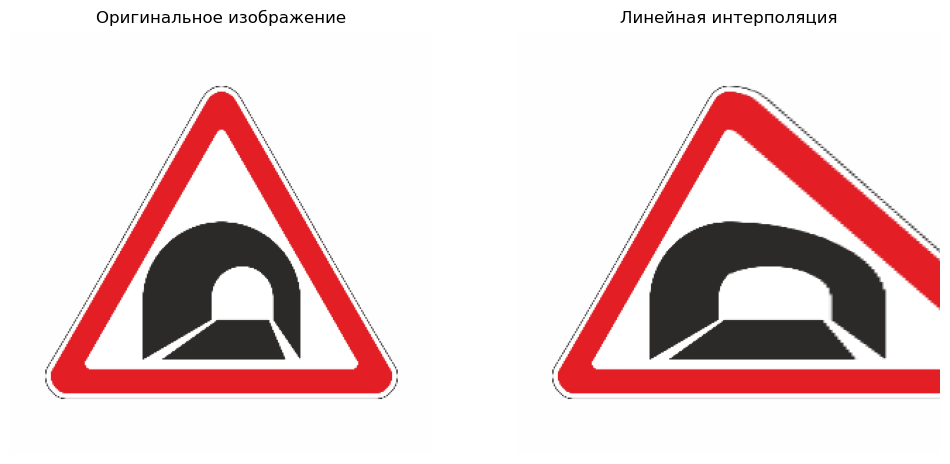

In [10]:
# Линейная интерполяция для части изображения
stretch_factor = 2
stretch_matrix = np.float32([[stretch_factor, 0, 0], [0, 1, 0]])
piecewise_linear_image = original_image.copy()
piecewise_linear_image[:, int(cols / 2):, :] = cv2.warpAffine(
    piecewise_linear_image[:, int(cols / 2):, :], stretch_matrix, (cols - int(cols / 2), rows)
)
compare_images(original_image, piecewise_linear_image, 'Линейная интерполяция')

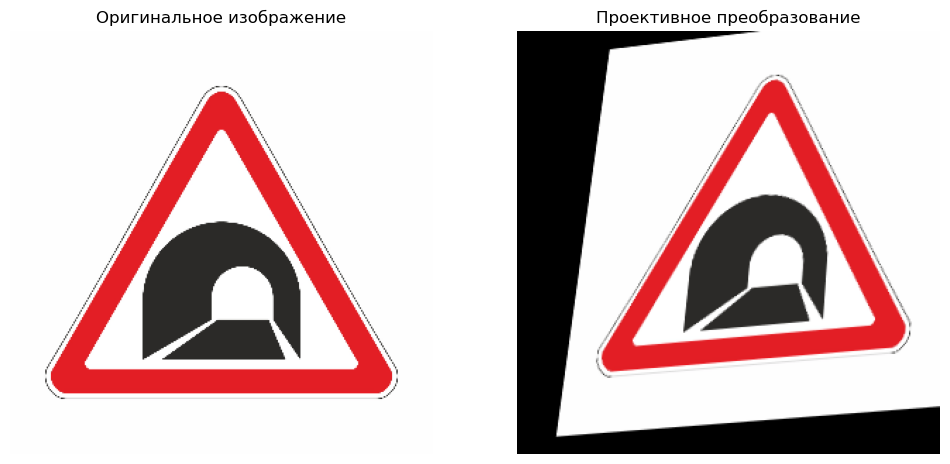

In [11]:
# Проективное преобразование изображения
source_points_projective = np.float32([[50, 461], [461, 461], [461, 50], [50, 50]])
destination_points_projective = np.float32([[50, 461], [461, 440], [450, 10], [100, 50]])
projective_matrix = cv2.getPerspectiveTransform(source_points_projective, destination_points_projective)
projective_image = cv2.warpPerspective(original_image, projective_matrix, (cols, rows))
compare_images(original_image, projective_image, 'Проективное преобразование')

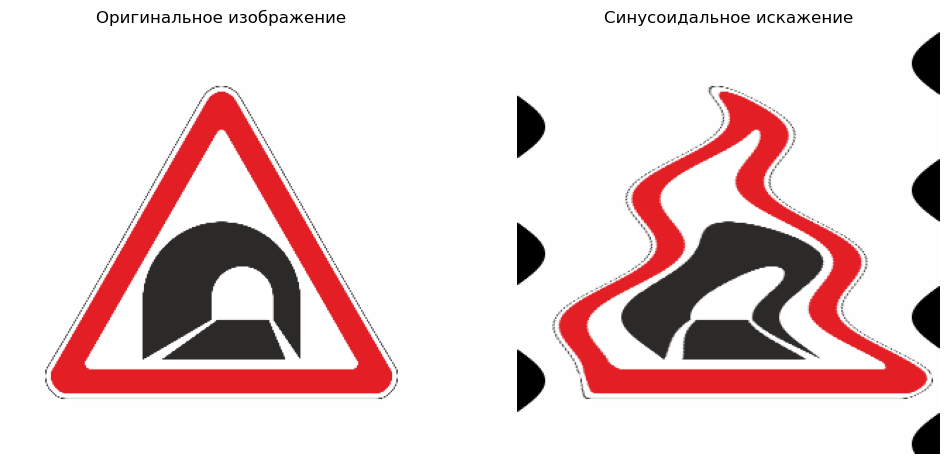

In [12]:
# Синусоидальное искажение изображения
u, v = np.meshgrid(np.arange(cols), np.arange(rows))
u = u + 20 * np.sin(2 * math.pi * v / 90)
sinusoidal_image = cv2.remap(original_image, u.astype(np.float32), v.astype(np.float32), cv2.INTER_LINEAR)
compare_images(original_image, sinusoidal_image, 'Синусоидальное искажение')

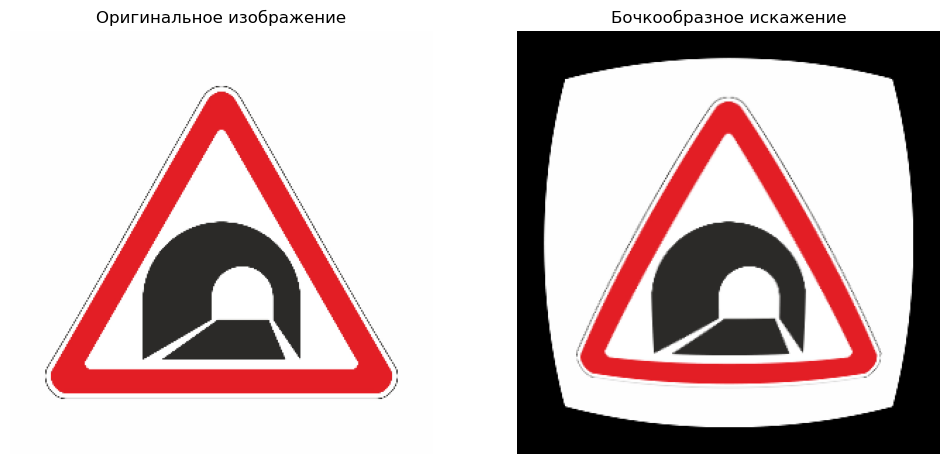

In [13]:
# Искажение бочкообразным искажением
xi, yi = np.meshgrid(np.arange(cols), np.arange(rows))
xmid = cols / 2.0
ymid = rows / 2.0
xi = xi - xmid
yi = yi - ymid
r, theta = cv2.cartToPolar(xi / xmid, yi / ymid)
F3 = 0.1
F5 = 0.12
r = r + F3 * r**3 + F5 * r**5
u, v = cv2.polarToCart(r, theta)
u = u * xmid + xmid
v = v * ymid + ymid
barrel_image = cv2.remap(original_image, u.astype(np.float32), v.astype(np.float32), cv2.INTER_LINEAR)
compare_images(original_image, barrel_image, 'Бочкообразное искажение')

Text(0.5, 1.0, 'Result')

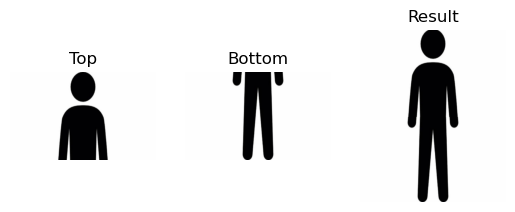

In [26]:
# Загрузка верхней и нижней частей изображения
top_part = cv2.imread('C:\\Users\\vs410\\Downloads\\siluet-cheloveka-17_1.jpg')
top_part = cv2.resize(top_part, (500, 300))
bottom_part = cv2.imread("C:\\Users\\vs410\\Downloads\\siluet-cheloveka-17_2.jpg")
bottom_part = cv2.resize(bottom_part, (500, 300))

# Сопоставление шаблона
template_size = 10
template = top_part[-template_size:, :, :]
result = cv2.matchTemplate(bottom_part, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Создание результирующего изображения
combine_image = np.zeros((top_part.shape[0] + bottom_part.shape[0] - max_loc[1] - template_size,
                         top_part.shape[1], top_part.shape[2]), dtype=np.uint8)
combine_image[0:top_part.shape[0], :, :] = top_part
combine_image[top_part.shape[0]:, :, :] = bottom_part[max_loc[1] + template_size:, :, :]

# Отображение результирующего изображения
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(top_part, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Top')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(bottom_part, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Bottom')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(combine_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Result')